# This will be the main file for the final
    -Feel free to add more functions to the first block as well as make other files

In [44]:
#Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Improt the CSV and make the chonky dataframe
data = pd.concat([pd.read_csv('data/phs_2020_1.csv'),pd.read_csv('data/phs_2020_2.csv')])
del data["start_time"]
del data["esports_match_id"]

#Make some useful functions and variables
allPlayers = data["player_name"].unique()
allStats = data["stat_name"].unique()
heroNames = data["hero_name"].unique()
tankHeros = ["D.Va","Orisa","Reinhardt","Roadhog", "Sigma", "Winston", "Wrecking Ball", "Zarya"]
dpsHeros = ["Ashe","Bastion","Doomfist","Echo","Genji","Hanzo","Junkrat","McCree","Mei","Pharah","Reaper","Soldier: 76","Sombra","Symmetra","Torbjörn","Tracer","Widowmaker"]
supportHeros = ["Ana","Baptiste","Brigitte","Lúcio","Mercy","Moira","Zenyatta"]
#These stats are total stats, so they need to be adjusted with time (getPlayerData function does this automatically)
importantTotalStats = ["All Damage Done", "Damage Taken", "Deaths", "Final Blows", "Objective Kills", "Healing Done"]

#Returns a dataframe with the important stats for a specific player with respect to time
#Note that certian stats are tracked oddly in the dataset (i.e Hog Heal is not attributed to Healing Recieved) so be aware of that
def getPlayerData(playerName):
    playerFrame = data[data.player_name == playerName]
    returnFrame = pd.DataFrame(index=playerFrame["hero_name"].unique())
    timeFrame = playerFrame[playerFrame.stat_name == "Time Played"]  
    timeFrame = timeFrame.groupby(timeFrame["hero_name"]).sum()
    #Converts to per 10 min instead of per second
    timeFrame = timeFrame / 600
    for stat in importantTotalStats:
        tempFrame = playerFrame[playerFrame.stat_name == stat]  
        tempFrame = tempFrame.groupby(tempFrame["hero_name"]).sum()
        tempFrame = tempFrame / timeFrame
        returnFrame[stat] = tempFrame["stat_amount"]
    returnFrame = returnFrame.dropna(how='all')
    return returnFrame.fillna(0)
    

In [52]:
#Make a List containing dataFrames of each player's important stats
adjustedData = {}
for player in allPlayers:
    adjustedData[player] = getPlayerData(player)
#To show a specific player, do   adjustedData['Rascal']

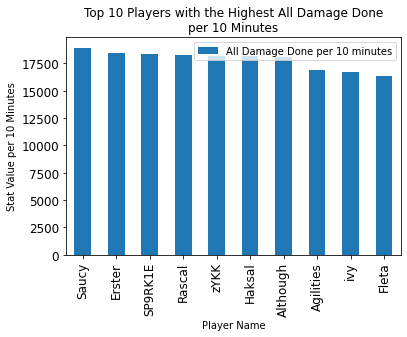

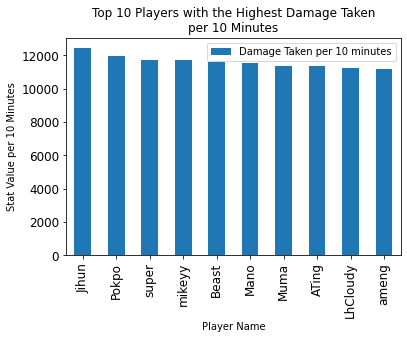

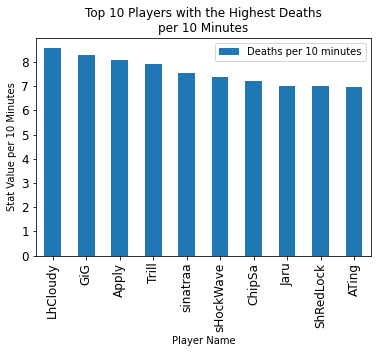

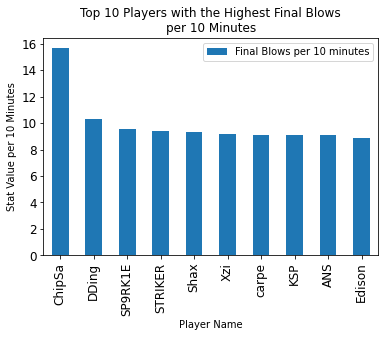

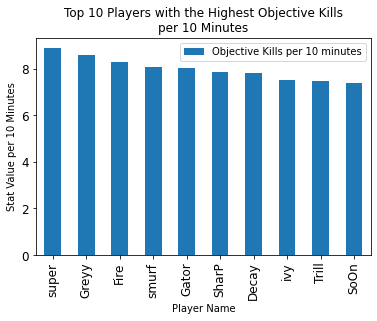

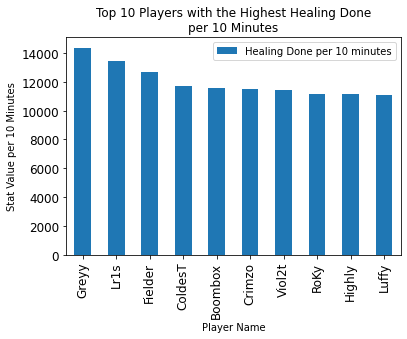

In [135]:
#Create a graph for each stat showing the top 10 players with that specific stat
for stat in importantTotalStats:
    statValues = {}
    for player in allPlayers:
        statValues[player] = adjustedData[player].loc[["All Heroes"]][stat].values.item()
    statFrame = pd.DataFrame.from_dict(statValues, orient = 'index', columns = [stat + " per 10 minutes"])
    statFrame = statFrame.sort_values(by=[stat + " per 10 minutes"], ascending = False)
    statFrame = statFrame.iloc[0:10]
    statFrame.plot(kind='bar', xlabel = "Player Name", ylabel = "Stat Value per 10 Minutes", title = "Top 10 Players with the Highest " + stat + "\nper 10 Minutes", fontsize = 12)